Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

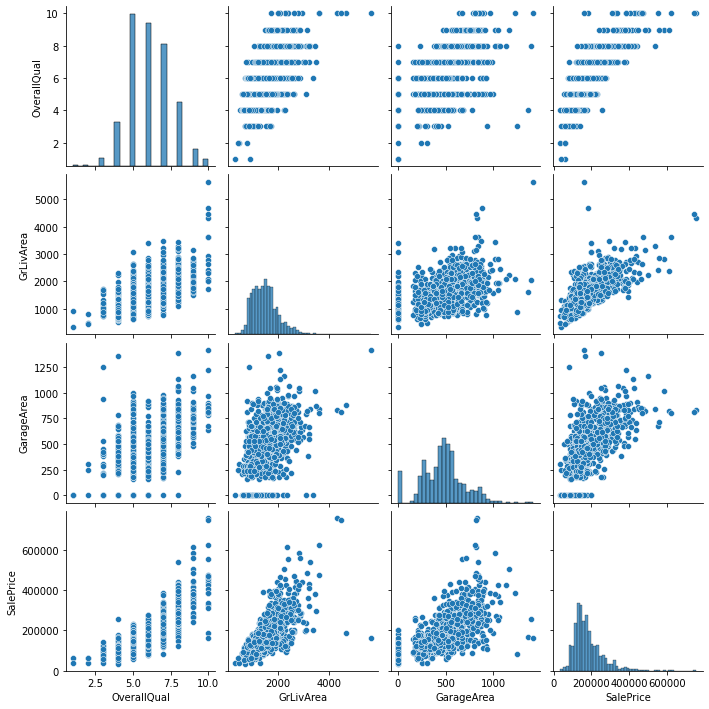

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


train = pd.read_csv('train.csv')

corr = train.corr()
train = train[['OverallQual', 'GrLivArea', 'GarageArea','SalePrice']]
train = train.dropna()

x = train[['OverallQual', 'GrLivArea', 'GarageArea']]

y = train['SalePrice']
x = x.dropna()
# X = train.drop(['BsmtFinSF2','BsmtHalfBath','EnclosedPorch','id','KitchenAbvGr','LowQualFinSF'], axis = 1)
print(corr['SalePrice'])
sns.pairplot(train, vars=['OverallQual', 'GrLivArea', 'GarageArea', 'SalePrice'])



In [2]:
# train = train.to_numpy()
y = y.to_numpy()
x = x.to_numpy()
x = x.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)
#4. Split the data into training and test parts. You are free to choose the split ratio. The
#odels are to be created using the training part of the dataset.
train, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=4)

#xtrain = np.nan_to_num(xtrain)
#xtest = np.nan_to_num(xtest)

reg = LinearRegression().fit(xtrain, ytrain)
ypred = reg.predict(xtest)
score = reg.score(xtrain, ytrain)
print("LinearRegression")
print("R-squared:", score)
mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01, max_iter=100000))
])

# Scale the data and fit the model
pipeline.fit(xtrain, ytrain)

#sgdr = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01, max_iter=100000)

print("SGDRegressor")
print(pipeline)

#sgdr.fit(xtrain, ytrain)

score = pipeline.score(xtrain, ytrain)
print("R-squared:", score)


ypred = pipeline.predict(xtest)
mse = mean_squared_error(ytest, ypred)

print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))


LinearRegression
R-squared: 0.7306040498664287
MSE:  1102027991.178412
RMSE:  33196.80694251198
SGDRegressor
Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression',
                 SGDRegressor(max_iter=100000, n_iter_no_change=50,
                              penalty=None))])
R-squared: 0.7305186194295772
MSE:  1105601663.0657866
RMSE:  33250.588913067186
